In [72]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

# Dataset

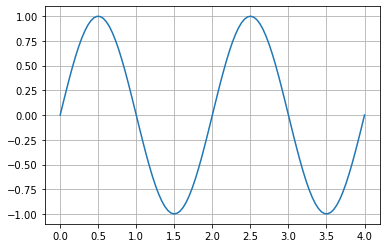

In [196]:
t = torch.linspace(0, 4)
sin = torch.sin(np.pi * t)
plt.plot(t, sin)
plt.grid(True)

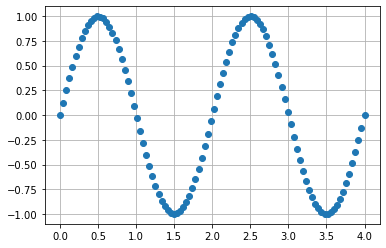

In [197]:
plt.plot(t, sin, 'o')
plt.grid(True)

In [198]:
sin.shape

torch.Size([100])

# Prepare Dataset for RNN

In [199]:
# input and labels for RNN (L=50, N=1, F_in=1)
x = sin[0:25]
y = sin[50:50+25]
print(x.shape)
print(y.shape)

torch.Size([25])
torch.Size([25])


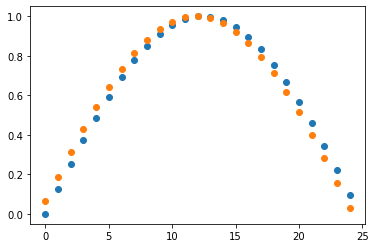

In [202]:
plt.plot(x, 'o')
plt.plot(y, 'o')

In [179]:
# Helper Function
def ploter(x = None, y = None, L, mode = None):
    if mode == 'x':
        x = x.view(L)
        t_x = torch.from_numpy(np.linspace(0, len(x), len(x)))
        plt.plot(t_x,x)
        plt.grid(True)
    elif mode == 'y':
        y = y.view(L)
        t_y = torch.from_numpy(np.linspace(0, len(y), len(y)))
        plt.plot(t_y,y)
        plt.grid(True)
    else:
        x = x.view(L)
        y = y.view(L)
        t_x = torch.from_numpy(np.linspace(0, len(x), len(x)))
        t_y = torch.from_numpy(np.linspace(len(x), len(x) + len(y), len(y)))
        plt.plot(t_x,x)
        plt.plot(t_y,y)
        plt.grid(True)

SyntaxError: non-default argument follows default argument (Temp/ipykernel_5792/330100373.py, line 2)

In [180]:
ploter(x, 50, 'x')

TypeError: view() received an invalid combination of arguments - got (str), but expected one of:
 * (tuple of ints size)
      didn't match because some of the arguments have invalid types: (!str!)
 * (torch.dtype dtype)
      didn't match because some of the arguments have invalid types: (!str!)


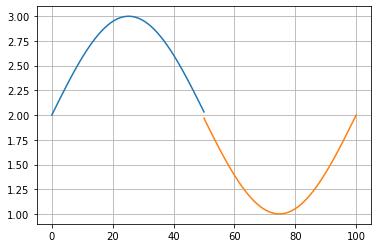

In [181]:
ploter(x,y, 50)

# Normalizing

# Net

In [208]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.RNN(1, 1)

    def forward(self, x):
        x = x.view(25, 1, 1)
        out, _ = self.net(x)
        return out

In [209]:
model = Net()
print(model)

Net(
  (net): RNN(1, 1)
)


In [210]:
param_names = iter(model.named_parameters())
for params in model.parameters():
    print(next(param_names)[0],":")
    print(params.shape)

net.weight_ih_l0 :
torch.Size([1, 1])
net.weight_hh_l0 :
torch.Size([1, 1])
net.bias_ih_l0 :
torch.Size([1])
net.bias_hh_l0 :
torch.Size([1])


In [211]:
x.shape

torch.Size([25])

In [212]:
model(x).shape

torch.Size([25, 1, 1])

# Hyperparameter

In [213]:
lr = 0.001
epochs = 10

In [214]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [216]:
for epoch in range(1, epochs+1):

    model.train()
    optimizer.zero_grad()
    y_hat = model(x)
    loss = criterion(y_hat, y.view(25,1,1))
    print(loss)

    loss.backward()
    optimizer.step()

RuntimeError: all elements of input should be between 0 and 1

In [190]:
y_hat.min()

tensor(-0.3603, grad_fn=<MinBackward1>)